In [124]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy import random
from q_learning import QLearningAgent

%matplotlib inline
%load_ext autoreload
%autoreload 2

matplotlib.rcParams.update({'font.size': 12})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
def learn(alpha=0.1, gamma=0.9, epsilon=0.1, random_games=10, max_games=100, 
          rewards={'hit':-100, 'go':1}):
    learning_agent = QLearningAgent(alpha, gamma, epsilon, rewards)
    learning_agent.agent.display_mode = False
    lifetimes = []
    count_games = 0

    # learn 
    while count_games < max_games:
        game_over = False
        reward = 0
        while not game_over:
            if count_games < random_games:
                action = random.randint(2)
            else:
                action = learning_agent.get_action()
            learning_agent.agent.move(action)
            next_state = learning_agent.agent.get_state()
            reward += learning_agent.agent.get_reward()
            learning_agent.update(next_state, reward, action)
            game_over = learning_agent.agent.HIT
        lifetimes.append(learning_agent.t)
        learning_agent.reset()
        count_games += 1

    # display info
    scores = np.array(lifetimes) // 10
    print('Trained on {g} games, average score: {s}, states explored: {n}'
          .format(g=max_games, s=np.mean(scores), n=len(learning_agent.Q)))
    return np.cumsum(scores) / np.arange(1, max_games + 1)

In [136]:
eps_list = np.linspace(0.1, 0.5, 5)
results = np.zeros([len(eps_list), 1000])
nb_sim = 5

for sim in range(nb_sim):
    print('Simulation {s}/{st}'.format(s=sim, st=nb_sim))
    for i in range(len(eps_list)):
        results[i, :] += learn(alpha=0.1, gamma=0.9, epsilon=eps_list[i], random_games=0, 
                            max_games=1000, rewards={'hit':-2, 'go':1})
results /= nb_sim

Simulation 0 over 5
Trained on 1000 games, average score: 2.412, states explored: 53
Trained on 1000 games, average score: 2.886, states explored: 91
Trained on 1000 games, average score: 2.91, states explored: 194
Trained on 1000 games, average score: 1.699, states explored: 163
Trained on 1000 games, average score: 0.834, states explored: 132
Simulation 1 over 5
Trained on 1000 games, average score: 0.14, states explored: 37
Trained on 1000 games, average score: 3.42, states explored: 68
Trained on 1000 games, average score: 2.274, states explored: 155
Trained on 1000 games, average score: 1.573, states explored: 136
Trained on 1000 games, average score: 1.081, states explored: 149
Simulation 2 over 5
Trained on 1000 games, average score: 0.059, states explored: 34
Trained on 1000 games, average score: 3.377, states explored: 111
Trained on 1000 games, average score: 2.394, states explored: 79
Trained on 1000 games, average score: 1.93, states explored: 197
Trained on 1000 games, ave

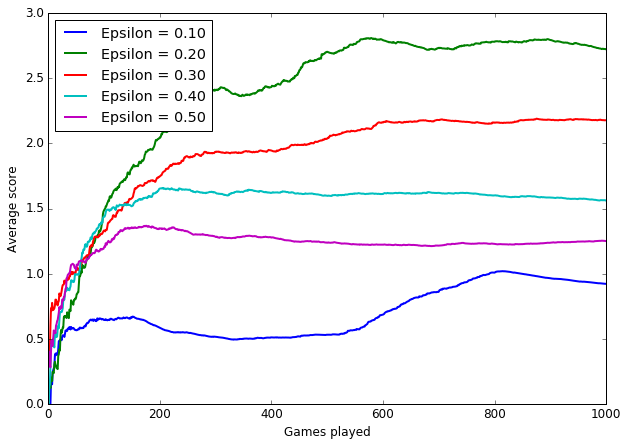

In [138]:
plt.figure(figsize=(10, 7))
plt.plot(results.T, linewidth=2)
plt.xlabel('Games played')
plt.ylabel('Average score')
plt.legend(['Epsilon = %.2f' % e for e in eps_list], loc=2)
plt.savefig('epsilon.png', dpi=300)
plt.show()

In [158]:
rew_list = [-1, -2, -5, -10, -100]
results = np.zeros([len(rew_list), 1000])
nb_sim = 5

for sim in range(nb_sim):
    print('Simulation {s}/{st}'.format(s=sim+1, st=nb_sim))
    for i in range(len(rew_list)):
        results[i, :] += learn(alpha=0.1, gamma=0.9, epsilon=0.10, random_games=0, 
                            max_games=1000, rewards={'hit':rew_list[i], 'go':1})
results /= nb_sim

Simulation 1/5
Trained on 1000 games, average score: 2.118, states explored: 89
Trained on 1000 games, average score: 0.09, states explored: 40
Trained on 1000 games, average score: 2.464, states explored: 44
Trained on 1000 games, average score: 7.478, states explored: 54
Trained on 1000 games, average score: 10.217, states explored: 82
Simulation 2/5
Trained on 1000 games, average score: 0.049, states explored: 34
Trained on 1000 games, average score: 1.439, states explored: 40
Trained on 1000 games, average score: 0.825, states explored: 47
Trained on 1000 games, average score: 6.517, states explored: 46
Trained on 1000 games, average score: 7.958, states explored: 55
Simulation 3/5
Trained on 1000 games, average score: 0.08, states explored: 40
Trained on 1000 games, average score: 0.067, states explored: 63
Trained on 1000 games, average score: 1.634, states explored: 88
Trained on 1000 games, average score: 2.42, states explored: 111
Trained on 1000 games, average score: 8.49, st

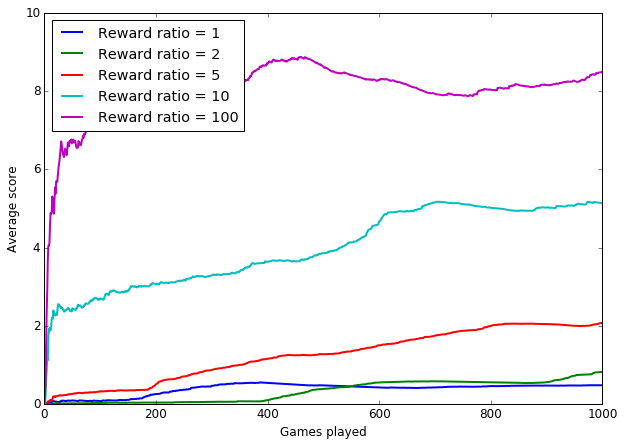

In [159]:
plt.figure(figsize=(10, 7))
plt.plot(results.T, linewidth=2)
plt.xlabel('Games played')
plt.ylabel('Average score')
plt.legend(['Reward ratio = %d' % -e for e in rew_list], loc=2)
plt.savefig('rewards.png', dpi=300)
plt.show()

In [160]:
alpha_list = [0.01, 0.05, 0.1, 0.2]
results = np.zeros([len(alpha_list), 1000])
nb_sim = 5

for sim in range(nb_sim):
    print('Simulation {s}/{st}'.format(s=sim+1, st=nb_sim))
    for i in range(len(alpha_list)):
        results[i, :] += learn(alpha=alpha_list[i], gamma=0.9, epsilon=0.15, random_games=0, 
                            max_games=1000, rewards={'hit':-10, 'go':1})
results /= nb_sim

Simulation 1/5
Trained on 1000 games, average score: 3.581, states explored: 50
Trained on 1000 games, average score: 6.008, states explored: 98
Trained on 1000 games, average score: 2.33, states explored: 71
Trained on 1000 games, average score: 3.631, states explored: 77
Simulation 2/5
Trained on 1000 games, average score: 4.737, states explored: 52
Trained on 1000 games, average score: 4.404, states explored: 89
Trained on 1000 games, average score: 5.577, states explored: 81
Trained on 1000 games, average score: 3.664, states explored: 82
Simulation 3/5
Trained on 1000 games, average score: 3.729, states explored: 44
Trained on 1000 games, average score: 3.339, states explored: 71
Trained on 1000 games, average score: 3.97, states explored: 106
Trained on 1000 games, average score: 2.682, states explored: 102
Simulation 4/5
Trained on 1000 games, average score: 1.958, states explored: 99
Trained on 1000 games, average score: 2.56, states explored: 78
Trained on 1000 games, average 

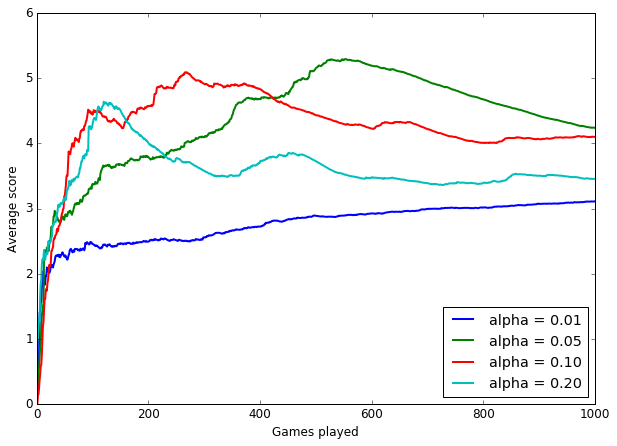

In [163]:
plt.figure(figsize=(10, 7))
plt.plot(results.T, linewidth=2)
plt.xlabel('Games played')
plt.ylabel('Average score')
plt.legend(['alpha = %.2f' %e for e in alpha_list], loc=4)
plt.savefig('alpha.png', dpi=300)
plt.show()

In [178]:
gamma_list = np.linspace(0.7, 0.99, 5)
results = np.zeros([len(gamma_list), 1000])
nb_sim = 5

for sim in range(nb_sim):
    print('Simulation {s}/{st}'.format(s=sim+1, st=nb_sim))
    for i in range(len(gamma_list)):
        results[i, :] += learn(alpha=0.1, gamma=gamma_list[i], epsilon=0.15, random_games=0, 
                            max_games=1000, rewards={'hit':-10, 'go':1})
results /= nb_sim

Simulation 1/10
Trained on 1000 games, average score: 4.26, states explored: 137
Trained on 1000 games, average score: 4.076, states explored: 65
Trained on 1000 games, average score: 2.198, states explored: 104
Trained on 1000 games, average score: 4.366, states explored: 81
Trained on 1000 games, average score: 3.659, states explored: 51
Simulation 2/10
Trained on 1000 games, average score: 5.079, states explored: 104
Trained on 1000 games, average score: 4.247, states explored: 99
Trained on 1000 games, average score: 4.941, states explored: 54
Trained on 1000 games, average score: 4.156, states explored: 64
Trained on 1000 games, average score: 4.622, states explored: 103
Simulation 3/10
Trained on 1000 games, average score: 4.225, states explored: 138
Trained on 1000 games, average score: 4.379, states explored: 69
Trained on 1000 games, average score: 4.965, states explored: 114
Trained on 1000 games, average score: 3.164, states explored: 69
Trained on 1000 games, average score:

In [182]:
np.std(results, axis=1)

array([ 0.64167363,  0.61798627,  0.67008717,  0.58817857,  0.46242036])

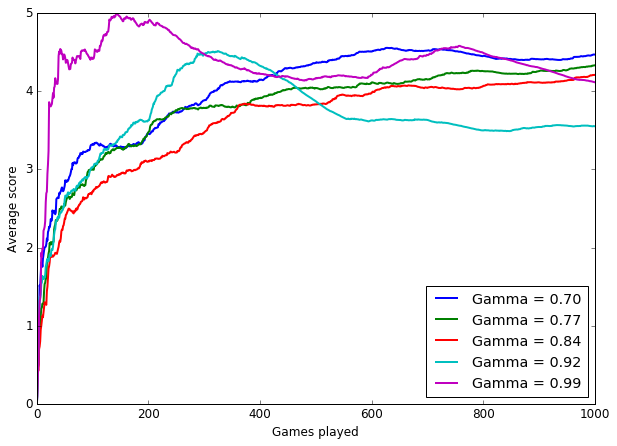

In [179]:
plt.figure(figsize=(10, 7))
plt.plot(results.T, linewidth=2)
plt.xlabel('Games played')
plt.ylabel('Average score')
plt.legend(['Gamma = %.2f' %e for e in gamma_list], loc=4)
plt.savefig('gamma.png', dpi=300)
plt.show()

In [187]:
results = np.zeros([1, 10000])
nb_sim = 1

for sim in range(nb_sim):
    print('Simulation {s}/{st}'.format(s=sim+1, st=nb_sim))
    results[0, :] += learn(alpha=0.01, gamma=0.8, epsilon=0.05, random_games=0, 
                            max_games=10000, rewards={'hit':-100, 'go':1})
results /= nb_sim

Simulation 1/1
Trained on 10000 games, average score: 14.0801, states explored: 104


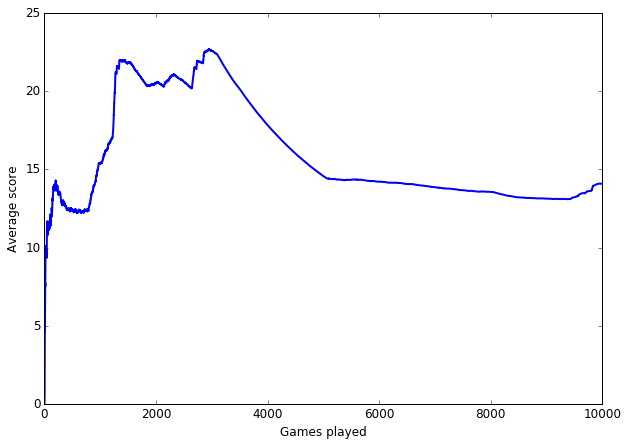

In [188]:
plt.figure(figsize=(10, 7))
plt.plot(results.T, linewidth=2)
plt.xlabel('Games played')
plt.ylabel('Average score')
plt.savefig('best.png', dpi=300)
plt.show()